In [3]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
plt.tight_layout()

## Preparation

In [4]:
# Load in datasets
# Conversation information
df = pd.read_csv('ALL_CONVERSATIONS_WRANGLED.csv')
print('Conversation information:')
display(df.head())

# Database
#conn = sqlite3.connect('full_conversation_database.db')
#conv_df = pd.read_sql('SELECT * FROM tweets', conn)
#print('Conversation database: ')
#display(conv_df.head())

Conversation information:


,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved
0,5,"[(747530773037780992, 31132554), (747526794446...",2,"[747526794446802944, 747530773037780992]","[22873368, 31132554]",['No airlines involved']
1,6,"[(747530681509625860, 417945325), (74745123859...",2,"[747451238598475776, 747530681509625860]","[55904765, 417945325]",['No airlines involved']
2,11,"[(747530531475173376, 597673831), (74752831114...",2,"[747528311144734720, 747530531475173376]","[427951650, 597673831]",['No airlines involved']
3,12,"[(747530509098450944, 1624311463), (7475297117...",2,"[747529711782244352, 747530509098450944]","[1624311463, 1624311463]",['No airlines involved']
4,14,"[(747530348561571840, 154605692), (74752081839...",2,"[747520818398232576, 747530348561571840]","[117754884, 154605692]",['No airlines involved']


## EDA

In [5]:
df['conversation_length'].value_counts().sort_index()

2     316059
3      72506
4      27504
5       7603
6       3195
7       1011
8        448
9        150
10        76
11        40
12        17
13         4
14         1
15         6
16         3
17         1
19         1
20         2
Name: conversation_length, dtype: int64

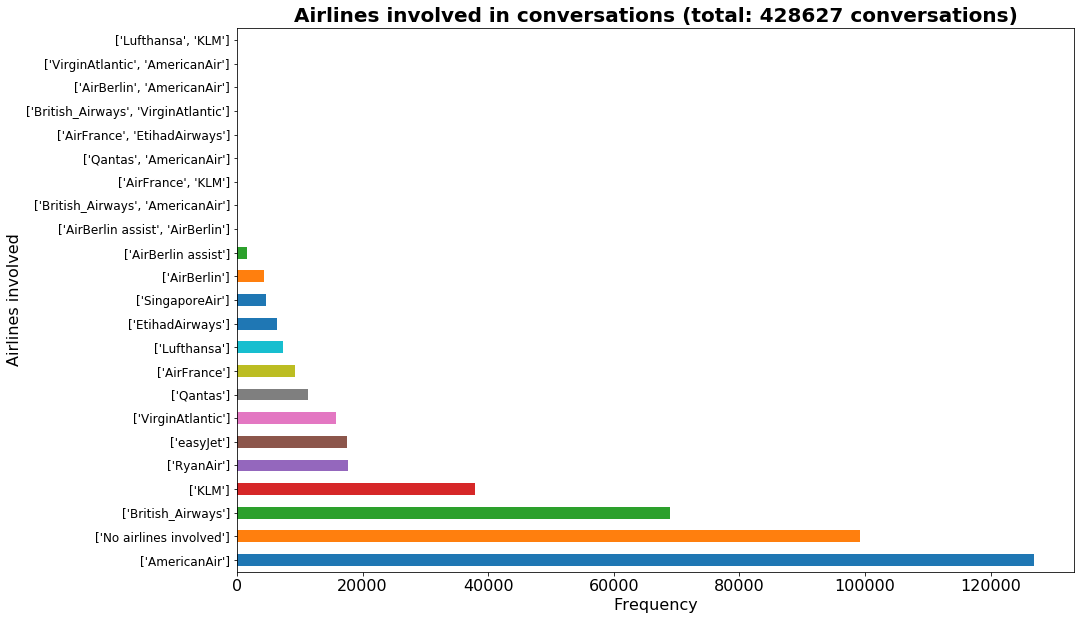

In [13]:
df['airlines_involved'].value_counts().plot(kind='barh', figsize=(15,10))
plt.title(f'Airlines involved in conversations (total: {len(df)} conversations)', weight='bold', fontsize=20)
plt.xlabel('Frequency', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.ylabel('Airlines involved', fontsize=16)
plt.savefig('airline_involvement_in_conversations', dpi=300)

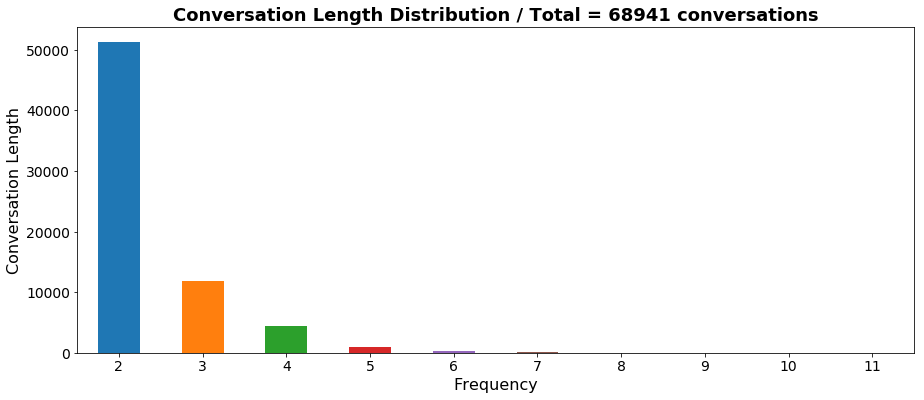

In [32]:
klm_df = df[df['airlines_involved'] == "['British_Airways']"]

klm_df['conversation_length'].value_counts().sort_index().plot(kind='bar', figsize=(15,6))
plt.title(f'Conversation Length Distribution / Total = {len(klm_df)} conversations', weight='bold', fontsize=18);
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Conversation Length', fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.savefig('conversation_length_distribution_british_airways', dpi=300)

## Check long conversations

In [8]:
long_conv = df[df['conversation_length'] == 20]

In [9]:
long_conv_user_ids = eval(long_conv['user_ids'].values[1])
long_conv_tweet_ids = eval(long_conv['tweet_ids'].values[1])

In [10]:
long_conv.head()

,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved
192752,458417,"[(781120814590681088, 242747093), (78112054383...",20,"[781108878918426624, 781110422476824576, 78111...","[242747093, 242747093, 242747093, 242747093, 2...",['No airlines involved']
293673,719667,"[(800121958197329920, 42341428), (800107205894...",20,"[799981590357114880, 799985021129986048, 80001...","[42341428, 22536055, 42341428, 22536055, 42341...",['AmericanAir']


In [33]:
#long_conv_text = conv_df[conv_df['id_str'].isin([str(tweet) for tweet in long_conv_tweet_ids])]['text'].values
#print('Example conversation:')
#i = 1
#for tweet in long_conv_text:
#    print(f'Tweet {i}: {tweet}')
#    i+=1